# Fasttext Encoding + Random Forest Classifier

In [1]:
#importing libraries

# data manipulation
import pandas as pd

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# encoding text information usinf fasttext encoder
from embedding_as_service.text.encode import Encoder

# scikit model used
from sklearn.ensemble import RandomForestClassifier

# metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#removing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/content/ticket_train.csv')
valid = pd.read_csv('/content/ticket_valid.csv')

## Fasttext Encoding

In [3]:
# initialising encoder
fasttext_en = Encoder(embedding='fasttext', model='common_crawl_300')

1000it [00:00, 9992.70it/s]

Loading Model (this might take few minutes).....


1999995it [03:54, 8521.04it/s]

Model loaded Successfully !


### Encoding training datasets

In [4]:
# encoding training dataset
fasttext_train_vecs = fasttext_en.encode(texts = list(train['info'].values), pooling='reduce_mean')

In [5]:
fasttext_train_vecs.shape

(38839, 300)

In [6]:
fasttext_train_vecs

array([[ 0.00728672, -0.00506562, -0.00520078, ...,  0.01057891,
        -0.00600937, -0.00492188],
       [ 0.00256172,  0.00128047, -0.00835781, ..., -0.01101406,
         0.00139844,  0.01202734],
       [-0.00926875,  0.02020156, -0.00615312, ..., -0.01895   ,
        -0.00510313, -0.00916797],
       ...,
       [ 0.00094297, -0.00193359, -0.01193906, ..., -0.00394609,
         0.00141016, -0.00152422],
       [-0.00793906,  0.02531172, -0.01642422, ..., -0.00886953,
         0.00726953, -0.000475  ],
       [ 0.00910469,  0.04631719, -0.04369141, ...,  0.00188672,
        -0.10274141, -0.05983047]])

### Encoding validating datasets

In [7]:
# encoding validation dataset
fasttext_valid_vecs = fasttext_en.encode(texts = list(valid['info'].values), pooling='reduce_mean')

In [8]:
fasttext_valid_vecs.shape

(4855, 300)

## Modelling

In [9]:
# creating Random Forest Classifier instance
RFClf = RandomForestClassifier(random_state=35)

In [10]:
# fitting the model with training fasttext encoded vector and target ticket_type column
RFClf.fit(fasttext_train_vecs, train['ticket_type'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=35, verbose=0,
                       warm_start=False)

In [11]:
# predicting validating dataset ticket-type using validation fasttext encoded vector
y_valid_preds = RFClf.predict(fasttext_valid_vecs)

## Model Evaluation

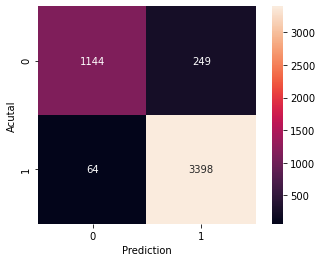

In [12]:
con_mat = confusion_matrix(valid['ticket_type'], y_valid_preds)
sns.heatmap(con_mat, annot=True, fmt='.0f', square=True)
plt.xlabel('Prediction')
plt.ylabel('Acutal')
plt.show()

In [13]:
acc = accuracy_score(valid['ticket_type'], y_valid_preds)
print(f'Model accuracy score = {acc*100:0.2f}%.')

Model accuracy score = 93.55%.


In [14]:
print(classification_report(valid['ticket_type'], y_valid_preds))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1393
           1       0.93      0.98      0.96      3462

    accuracy                           0.94      4855
   macro avg       0.94      0.90      0.92      4855
weighted avg       0.94      0.94      0.93      4855

